<a href="https://colab.research.google.com/github/Songyang-W/fencing-kendo-posture-analysis/blob/main/Starter_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# --- Step 1: Install dependencies ---
!pip install mediapipe opencv-python matplotlib



In [ ]:

# --- Step 2: Imports ---
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

In [ ]:
# Initialize MediaPipe pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


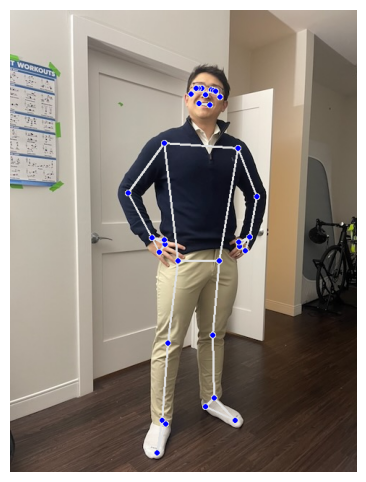

In [ ]:
# --- Step 3: Load a sample frame ---
# Replace with your fencing/kendo video frame
img_path = "/content/drive/MyDrive/sample_pose_img/williamstand.jpeg"
image = cv2.imread(img_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# --- Step 4: Run pose detection ---
results = pose.process(image_rgb)

# --- Step 5: Draw skeleton overlay ---
if results.pose_landmarks:
    mp_drawing.draw_landmarks(
        image_rgb,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS
    )

# --- Step 6: Show result ---
plt.figure(figsize=(6,6))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

Now, I'll update the image path to load the image from your Google Drive.

# Task
Process the video "wendy_kongfu" located in the "sample_pose_img" folder in Google Drive to detect and overlay pose skeletons using MediaPipe.

## Load the video

### Subtask:
Load the video from the specified path in your Google Drive.


**Reasoning**:
Load the video from the specified path in Google Drive and check if it was opened successfully.



In [ ]:
# --- Step 1: Define video path ---
video_path = "/content/drive/MyDrive/sample_pose_img/wendy_kongfu.mov"

# --- Step 2: Load the video ---
cap = cv2.VideoCapture(video_path)

# --- Step 3: Check if video opened successfully ---
if not cap.isOpened():
    print("Error: Could not open video.")
else:
    print(f"Video loaded successfully from: {video_path}")


Video loaded successfully from: /content/drive/MyDrive/sample_pose_img/wendy_kongfu.mov


## Process video frames

### Subtask:
Read the video frame by frame.


**Reasoning**:
Read the video frame by frame and store the frames in a list.



In [ ]:
# --- Step 1: Initialize a list to store frames ---
frames = []

# --- Step 2: Loop through the video frames ---
while cap.isOpened():
    ret, frame = cap.read()

    # --- Step 3: Check if frame was read successfully ---
    if not ret:
        break

    # --- Step 4: Store the raw frame (processing will be done later) ---
    frames.append(frame)

# --- Step 6: Release the video capture object ---
cap.release()

print(f"Successfully read {len(frames)} frames from the video.")

Successfully read 364 frames from the video.


## Perform pose detection on each frame

### Subtask:
Apply the MediaPipe pose detection to each frame.


**Reasoning**:
Iterate through the frames, convert each to RGB, and process with MediaPipe pose detection, storing the results.



In [ ]:
# --- Step 1: Initialize a list to store pose detection results ---
pose_results = []

# --- Step 2: Iterate through the frames ---
for frame in frames:
    # --- Step 3: Convert the frame from BGR to RGB ---
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # --- Step 4: Process the RGB frame with MediaPipe pose ---
    results = pose.process(frame_rgb)

    # --- Step 5: Store the pose detection results ---
    pose_results.append(results)

print(f"Successfully processed pose detection for {len(pose_results)} frames.")

Successfully processed pose detection for 364 frames.


## Draw skeleton overlay

### Subtask:
Draw the pose landmarks and connections on each frame.


**Reasoning**:
Iterate through the frames and their corresponding pose results, drawing the pose landmarks and connections on each frame if detected, and store the processed frames in a list.



In [ ]:
# --- Step 1: Initialize an empty list to store processed frames ---
processed_frames = []

# --- Step 2: Iterate through the original frames and their corresponding pose_results using zip ---
for frame, results in zip(frames, pose_results):
    # Create a copy of the frame to draw on, keeping the original untouched if needed later
    frame_with_overlay = frame.copy()
    # --- Step 3: For each frame and its results, check if results.pose_landmarks is not None ---
    if results.pose_landmarks:
        # --- Step 4: If pose landmarks are detected, draw the landmarks and connections on the current frame ---
        mp_drawing.draw_landmarks(
            frame_with_overlay,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS
        )
    # --- Step 5: Append the processed frame (with or without landmarks drawn) to the processed_frames list ---
    processed_frames.append(frame_with_overlay)

print(f"Successfully processed and drew overlays on {len(processed_frames)} frames.")

Successfully processed and drew overlays on 364 frames.


## Display or save the processed video

### Subtask:
Display the processed frames or save the processed video.


**Reasoning**:
Saving the processed frames to a video file is the most reliable way to display the results in a notebook environment. I will define the output path, get video properties, initialize a VideoWriter, write the frames, and release the writer.



In [ ]:
# --- Step 1: Define the output video path ---
output_video_path = "/content/drive/MyDrive/sample_pose_img/wendy_kongfu_processed.mp4"

# Re-open the video capture to get properties if the original 'cap' object was released
# or get properties from one of the frames if all frames have the same size
if 'cap' not in locals() or not cap.isOpened():
    cap_props = cv2.VideoCapture(video_path)
    if not cap_props.isOpened():
        print("Error: Could not reopen video to get properties.")
    else:
        frame_width = int(cap_props.get(cv2.CAP_PROP_FRAME_WIDTH))
        frame_height = int(cap_props.get(cv2.CAP_PROP_FRAME_HEIGHT))
        fps = int(cap_props.get(cv2.CAP_PROP_FPS))
        cap_props.release()
elif processed_frames:
    # Get dimensions from the first processed frame
    frame_height, frame_width, _ = processed_frames[0].shape
    # Assuming original FPS is still relevant, or set a default
    fps = 30 # Or retrieve from original cap if possible
else:
    print("Error: No processed frames to get dimensions from.")


# --- Step 2: Initialize VideoWriter ---
# Define the codec and create VideoWriter object.
# Using 'mp4v' for compatibility, or 'XVID' or 'MJPG' if mp4v doesn't work
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# --- Step 3: Write processed frames to the video file ---
for processed_frame in processed_frames:
    # Make sure the frame is in BGR format for cv2.VideoWriter
    frame_bgr = cv2.cvtColor(processed_frame, cv2.COLOR_RGB2BGR)
    out.write(frame_bgr)

# --- Step 4: Release the VideoWriter ---
out.release()

print(f"Processed video saved to: {output_video_path}")

Processed video saved to: /content/drive/MyDrive/sample_pose_img/wendy_kongfu_processed.mp4


## Summary:

### Data Analysis Key Findings

*   The video "wendy\_kongfu.mov" was successfully loaded from the specified Google Drive path.
*   A total of 364 frames were read from the video.
*   MediaPipe pose detection was successfully applied to each of the 364 frames.
*   Pose landmarks and connections were drawn as an overlay on frames where they were detected.
*   The processed frames with the pose skeleton overlay were successfully saved as a new video file named "wendy\_kongfu\_processed.mp4" in the same Google Drive folder.

### Insights or Next Steps

*   The process successfully demonstrated how to perform pose detection and overlay using MediaPipe on a video.
*   The saved video can now be reviewed to visually assess the accuracy and coverage of the pose detection for the specific movements in the "wendy\_kongfu" video.
